In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
df['target'] =digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
X = df.drop('target',axis = 'columns')
y = df.target

In [6]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train , y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [11]:
clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors' : np.arange(10)

})
clf.fit(X_train,y_train)

c:\Users\Suyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Suyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Suyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Suyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [12]:
clf.best_score_

0.9853924699961285

In [13]:
clf.best_params_

{'n_neighbors': 1}

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.score(X_test,y_test)

0.9916666666666667

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_pred = knn.predict(X_test)
cm =confusion_matrix(y_test,y_pred)
 

Text(95.72222222222221, 0.5, 'Actual')

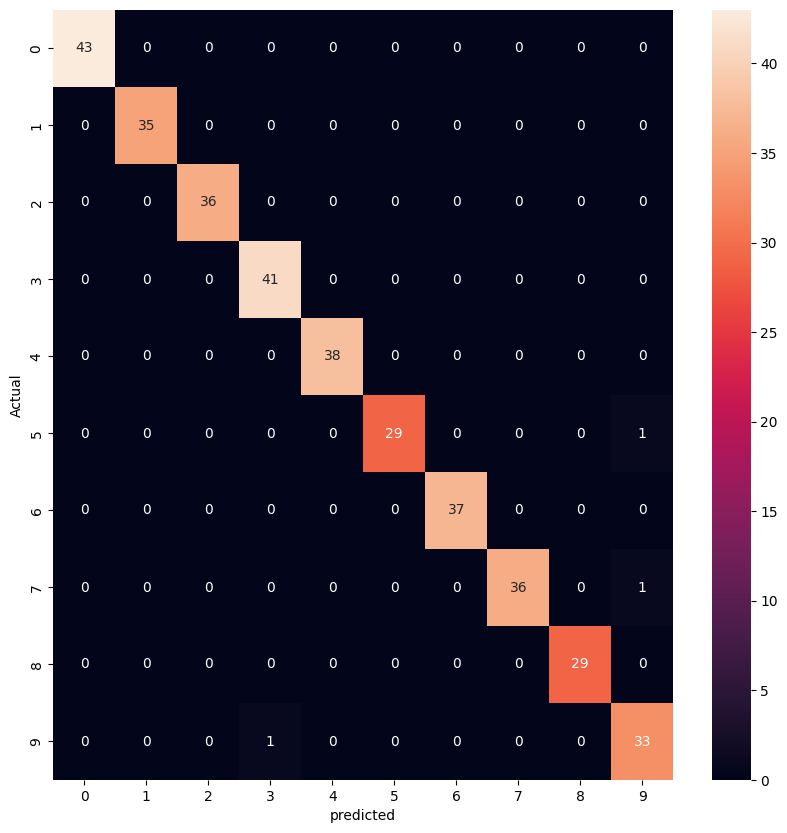

In [19]:
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       1.00      1.00      1.00        38
           5       1.00      0.97      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      1.00      1.00        29
           9       0.94      0.97      0.96        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

